## 2021 Census Data
In this notebook is used to obtain census 2021 data. This is an exploratory process. While I tried to create a methodological framework by following through the ONS documentation to their API, I also explored different methods for troubleshooting. Therefore, the flow of the workbook could be fragmented. However, the output of this notebook serves as a rough guide as to what are the possible (and impossible) ways to request 2021 Census data through the API.

In [72]:
# data management pacakge
import pandas as pd
import numpy as np
import geopandas as gpd
from itertools import product

# API requests package
import requests
from custom_function import * 
import time
from bs4 import BeautifulSoup
from scrapy import Selector

# data viz
import matplotlib.pyplot as plt 

In [73]:
# define header
header = {'user-agent': "onsExplore/Version1.0.0 (org email)"}
base = "https://api.beta.ons.gov.uk/v1"
uri = "/population-types/UR/census-observations?area-type=ctry,E92000001&dimensions=health_in_general,highest_qualification"

# define the custom function to concatenante base url with query string
def paste_url(uri):
    return base + uri

## Inspecting the Documentation Result
According to the [documentation](https://developer.ons.gov.uk/createyourowndataset/), a succcessful API request should define the follow parameters:
* Population-types
* Area-type
* Dimension

We will first look at the structure of the url that is used as an example in the documentation.

In [74]:
res = requests_get(paste_url(uri), headers = header)

requesting https://api.beta.ons.gov.uk/v1/population-types/UR/census-observations?area-type=ctry,E92000001&dimensions=health_in_general,highest_qualification


In [75]:
res.json()

{'observations': [{'dimensions': [{'dimension': 'Countries',
     'dimension_id': 'ctry',
     'option': 'England',
     'option_id': 'E92000001'},
    {'dimension': 'General health (6 categories)',
     'dimension_id': 'health_in_general',
     'option': 'Does not apply',
     'option_id': '-8'},
    {'dimension': 'Highest level of qualification (8 categories)',
     'dimension_id': 'highest_qualification',
     'option': 'Does not apply',
     'option_id': '-8'}],
   'observation': 0},
  {'dimensions': [{'dimension': 'Countries',
     'dimension_id': 'ctry',
     'option': 'England',
     'option_id': 'E92000001'},
    {'dimension': 'General health (6 categories)',
     'dimension_id': 'health_in_general',
     'option': 'Does not apply',
     'option_id': '-8'},
    {'dimension': 'Highest level of qualification (8 categories)',
     'dimension_id': 'highest_qualification',
     'option': 'No qualifications',
     'option_id': '0'}],
   'observation': 0},
  {'dimensions': [{'dimensio

## Population Type


In [76]:
# define the population type parameter
uri = "/population-types"

# get response
res = requests_get(paste_url(uri),header)


requesting https://api.beta.ons.gov.uk/v1/population-types


In [77]:
# tabulate the population types
poptype_df = pd.json_normalize(res.json()['items'])
# print the result
poptype_df

,name,label,description,type
0,atc-rm-pk1-dwl-ct-ltla,Dwellings,Dwellings,tabular
1,atc-rm-pk1-dwl-ct-msoa,Dwellings,Dwellings,tabular
2,atc-rm-pk1-dwl-ct-oa,Dwellings,Dwellings,tabular
3,atc-rm-pk2-hrp-ct-oa,All Household Reference Persons,All Household Reference Persons,tabular
4,atc-rm-pk2-ur-ct-oa,All usual residents,All usual residents,tabular
5,atc-rm-pk2-urfamdc-ct-oa,All usual residents in families with dependent...,All usual residents in families with dependent...,tabular
6,atc-rm-pk2-urhh-ct-msoa,All usual residents in households,All usual residents in households,tabular
7,atc-rm-pk3-ce-ct-msoa,All communal establishments,All communal establishments,tabular
8,atc-rm-pk3-fam-ct-oa,All families,All families,tabular
9,atc-rm-pk3-hh-ct-ltla,All households,All households,tabular


## Area Types
In most cases, we will only look at *all the households* and/or *all usual residents* within a geographical region. Looking at the above table, there are duplicates in these entries and it is not transparent what these different encoding meant. We will try to subset these codes into a list of relevant pop-types and observe they may yield different area-types.

In [78]:
# major pop types
major_pop_df = poptype_df.query("label == 'All households' | label == 'All usual residents'").sort_values("label")
# generate an iterator for the pop name
pop_names = iter(major_pop_df['name'])

In [79]:
# get the next pop-type encoding
try:
    pop_type = next(pop_names)
except:
    print("All population type encoding has been iterated through.")
# pass the pop into the query string
uri = f"/population-types/{pop_type}/area-types"
# request the result
res = requests_get(paste_url(uri), header)
pd.json_normalize(res.json()['items'])

requesting https://api.beta.ons.gov.uk/v1/population-types/atc-rm-pk3-hh-ct-ltla/area-types


,id,label,description,total_count,hierarchy_order
0,nat,England and Wales,Data for both England and Wales.,1,1400
1,ctry,Countries,Data for either the whole of England or Wales.,2,1300
2,rgn,Regions,"Data for the nine regions in England, and Wale...",10,1200
3,nhser,NHS England regions,Each NHS region is responsible for planning lo...,8,1100
4,lhb,Local health boards,Local health boards in Wales are responsible f...,8,1000
5,icb,Integrated care boards,Integrated care boards in England are responsi...,43,900
6,sicbl,Sub integrated care board locations,Sub integrated care board locations have repla...,107,800
7,utla,Upper tier local authorities,Upper tier local authorities provide a range o...,174,700
8,ltla,Lower tier local authorities,Lower tier local authorities provide a range o...,331,600
9,msoa,Middle layer Super Output Areas,Middle layer Super Output Areas (MSOAs) are ma...,7264,300


Running the above cell multiple times, we do see some changes with the area types avaialble. However, it seems all the population-types can be matched with the MSOA area-type.
We will now look at the result. The code is similar to the chunk above. The difference is in the uri that we will use.

In [80]:
area_types = "msoa"

# get the next pop-type encoding
try:
    pop_type = next(pop_names)
except:
    print("All population type encoding has been iterated through.")

# pass the pop into the query string
uri = f"/population-types/{pop_type}/area-types/{area_types}/areas"
# request the result
res = requests_get(paste_url(uri), header)
pd.json_normalize(res.json()['items'])

requesting https://api.beta.ons.gov.uk/v1/population-types/atc-rm-pk3-hh-ct-oa/area-types/msoa/areas


,id,label,area_type
0,E02000001,City of London 001,msoa
1,E02000002,Barking and Dagenham 001,msoa
2,E02000003,Barking and Dagenham 002,msoa
3,E02000004,Barking and Dagenham 003,msoa
4,E02000005,Barking and Dagenham 004,msoa
5,E02000007,Barking and Dagenham 006,msoa
6,E02000008,Barking and Dagenham 007,msoa
7,E02000009,Barking and Dagenham 008,msoa
8,E02000010,Barking and Dagenham 009,msoa
9,E02000011,Barking and Dagenham 010,msoa


Oddly, the area-types returned by the API requets only shows 29 MSOAs.

## Topics in Census 2021
Dimensions in the query string refers to the *variable topics*. This can be determined using the ONS [Variables by topic page](https://www.ons.gov.uk/census/census2021dictionary/variablesbytopic). Alternatively, we can use the api again to determine the dimension-population type pair.
In order to record the variables that can be taken in for each population type.

In [82]:
# instantiate an empty dataframe
dimensions = pd.DataFrame()

# define the 
for key, val in major_pop_df.iterrows():
    # parse the data from the pop-type dataframe
    pop_type = val['name']
    label = val['label']
    try:
        uri = f"/population-types/{pop_type}/dimensions"
        # request the result
        res = requests_get(paste_url(uri), header)
        new_data = pd.json_normalize(res.json()['items'])
        new_data["pop_type"] = [pop_type for _ in range(len(new_data))]
        new_data["pop_label"] = [label for _ in range(len(new_data))]
        time.sleep(0.3)
    except:
        print(f"an error occured parsing the data from the url of pop-type {pop_type}")
    else:
        dimensions = pd.concat([dimensions,new_data], ignore_index=True)


requesting https://api.beta.ons.gov.uk/v1/population-types/atc-rm-pk3-hh-ct-ltla/dimensions
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-rm-pk3-hh-ct-oa/dimensions
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-ts-demmig-hh-ct-oa/dimensions
an error occured parsing the data from the url of pop-type atc-ts-demmig-hh-ct-oa
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-rm-pk2-ur-ct-oa/dimensions
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-ts-demmig-ur-ct-oa/dimensions
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-ts-demmig-ur-pd-oa/dimensions
an error occured parsing the data from the url of pop-type atc-ts-demmig-ur-pd-oa
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-ts-eilr-ur-ct-msoa/dimensions
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-ts-hduc-ur-asp-ltla/dimensions
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-ts-hous-ur-ct-oa/dimensions


In [34]:
dimensions = dimensions.sort_values('id').reset_index(drop = True)
# inspect the result
dimensions.head()

,id,label,description,total_count,quality_statement_text,pop_type,pop_label
0,accommodation_type_5a,Accommodation type (5 categories),The type of building or structure used or avai...,5,We have made changes to housing definitions si...,atc-rm-pk3-urdchh-ct-msoa,All dependent children in households
1,ce_management_type_26a,Communal establishment management and type (26...,A managed communal establishment is a place th...,26,We have made changes to housing definitions si...,atc-rm-pk3-ce-ct-msoa,All communal establishments
2,ce_management_type_26a,Communal establishment management and type (26...,A managed communal establishment is a place th...,26,We have made changes to housing definitions si...,atc-ts-hous-urce-ct-msoa,All usual residents in communal establishments
3,ce_position_sex_age_19a,Position in communal establishment and sex and...,A usual resident of a communal establishment i...,19,,atc-ts-hous-urce-ct-msoa,All usual residents in communal establishments
4,dependent_child_age_3a,Dependent child age (3 categories),Counts dependent children and gives an age cla...,3,,atc-rm-pk3-urdchh-ct-msoa,All dependent children in households


## Area Code
As explored earlier, the area code returned by the API only contains 30 regions. To get all the MSOAs code, we need to find an alternative method. The MSOAs is available for download as a shapefile:

* [MSOA Boundary - polygons](https://geoportal.statistics.gov.uk/datasets/608940e46ed649e3b00a5409befe31f8_0/explore)
* [MSOA Population Weighted Centroid - points](https://geoportal.statistics.gov.uk/datasets/608940e46ed649e3b00a5409befe31f8_0/explore)
* [LSOA Boundary - polygons](https://geoportal.statistics.gov.uk/datasets/f3b0086377fa4b418197637e8e03c7b5_0/explore?location=52.812320%2C-2.465415%2C7.68)
* [LSOA Population Weighted Centroid - points](https://geoportal.statistics.gov.uk/datasets/79fa1c80981b4e4eb218bbce1afc304b_0/explore)

This could also be serched on the 

In [6]:
# load the MSOA shapefile
msoa = gpd.read_file("./data/MOSA_2021/")

# inspect the gdf
msoa.head()

,MSOA21CD,MSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E02000001,City of London 001,532384,181355,-0.093490,51.5156,283e7adc-faef-4736-9a0b-146cb27c72ec,"POLYGON ((532153.703 182165.155, 532158.250 18..."
1,E02000002,Barking and Dagenham 001,548267,189685,0.138756,51.5865,7b32290e-3b18-45b1-b5d5-bf778f71e3ce,"POLYGON ((548881.304 190819.980, 548881.125 19..."
2,E02000003,Barking and Dagenham 002,548259,188520,0.138149,51.5760,56f43674-2eda-47c0-819a-0cabeb9595f5,"POLYGON ((548958.555 189072.176, 548954.517 18..."
3,E02000004,Barking and Dagenham 003,551004,186412,0.176828,51.5564,fbedb5c5-b92a-475f-899e-1baf1dbae111,"POLYGON ((551550.056 187364.705, 551528.633 18..."
4,E02000005,Barking and Dagenham 004,548733,186824,0.144267,51.5607,f04829fe-a903-4bca-a88a-ace39fdbd3ac,"POLYGON ((549237.051 187627.941, 549241.319 18..."


In [7]:
# inspect the crs 
msoa.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

From this table, we can observe that the MSOA21CD encoding is equivalent to the get query we made earlies. We can try to randomly select a couple to see if this would give us any good result from the API request.

(54019.25349999955, 684303.1164999997, -27272.99899500003, 690146.230895001)

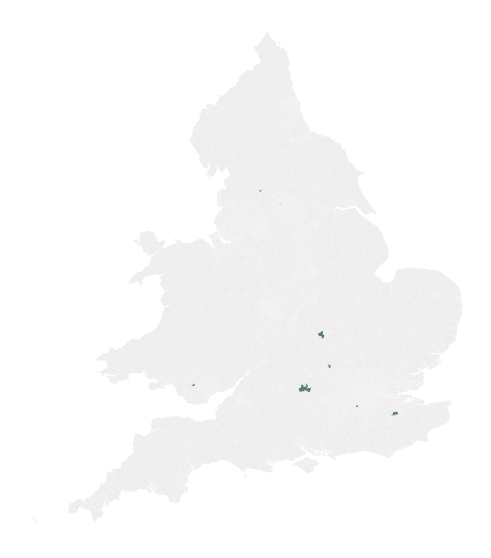

In [8]:
# get a random sample of 10 MSOA codes
msoa_cd_sample = list(msoa['MSOA21CD'].sample(n = 10, replace = False))

# let's plot these MSOA
fig, ax  = plt.subplots(figsize = (10,10))
# plot the non selected
msoa[~ msoa['MSOA21CD'].isin(msoa_cd_sample)] \
    .plot(color = "#EEEEEE",linewidth = 0.01,ax = ax)
# plot the sampled 
msoa[msoa['MSOA21CD'].isin(msoa_cd_sample)] \
    .plot(color = "#5A7D7C",linewidth = 2,ax = ax)

# remove the axes
ax.axis("off")



First let's just look at one area to see how the result is structured.

In [84]:
# instantiate a variable dataframe
val = dimensions.loc[2,:]
pop_type = val['pop_type']
dimension = "highest_qualification"
area = msoa_cd_sample[0]

# send the api request
uri = f"/population-types/{pop_type}/census-observations?area-type=msoa,{area}&dimensions={dimension}"
res = requests_get(paste_url(uri),header)

requesting https://api.beta.ons.gov.uk/v1/population-types/atc-rm-pk3-hh-ct-ltla/census-observations?area-type=msoa,E02005240&dimensions=highest_qualification
A 400 error occured when requesting the url


In [85]:
# iterate through the population type
for key, val in dimensions.iterrows():
    # parse the parameters
    pop_type = "atc-ts-eilr-ur-ct-msoa" #val['pop_type']
    dimension = val["id"]
    area = "E02000002"#msoa_cd_sample[1]

    # send the api request
    uri = f"/population-types/{pop_type}/census-observations?area-type=ctry,{area}&dimensions={dimension}"
    response = requests_get(paste_url(uri), header)
    if response != None:
        print("successful query")
    time.sleep(0.3)

requesting https://api.beta.ons.gov.uk/v1/population-types/atc-ts-eilr-ur-ct-msoa/census-observations?area-type=ctry,E02000002&dimensions=accommodation_type_5a
A 400 error occured when requesting the url
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-ts-eilr-ur-ct-msoa/census-observations?area-type=ctry,E02000002&dimensions=dwelling_hmo_unrelated
A 400 error occured when requesting the url
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-ts-eilr-ur-ct-msoa/census-observations?area-type=ctry,E02000002&dimensions=heating_type_3a
A 400 error occured when requesting the url
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-ts-eilr-ur-ct-msoa/census-observations?area-type=ctry,E02000002&dimensions=hh_multi_generation
A 400 error occured when requesting the url
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-ts-eilr-ur-ct-msoa/census-observations?area-type=ctry,E02000002&dimensions=hh_tenure_5a
A 400 error occured when requesting the 

In [ ]:
# inspect the resultof the 400 error message
requests.get(paste_url(uri), header).content

b'{"errors":["Only supports dataset of type microdata"]}'

## Merge Between Area and Population Type
As discussed above, the table returned from the population-type query returns duplicates of the same label. Cross validating with the area-type results, however, we can observe that the last substring divided by "-" in the name of popuylation type refers to the area type encoding.

Let's try to subset all the population type of area "MSOA" and see if they will return a more extensive list of area code.



In [37]:
# get the population type for msoa
msoa_poptype_df = poptype_df[poptype_df['name'].str.contains("-msoa")] \
                        .reset_index(drop = True)

In [49]:
# get the area type code
for key,val in msoa_poptype_df.iterrows():
    pop_type = val['name']
    # pass the pop into the query string
    uri = f"/population-types/{pop_type}/area-types"
    # request the result
    res = requests_get(paste_url(uri), header)
    area_type = pd.json_normalize(res.json()['items'])    
    # print if MSOA is available for this population type
    if "msoa" in list(area_type.id):
        print(f"{pop_type}: MSOA is available")


requesting https://api.beta.ons.gov.uk/v1/population-types/atc-rm-pk1-dwl-ct-msoa/area-types
atc-rm-pk1-dwl-ct-msoa: MSOA is available
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-rm-pk2-urhh-ct-msoa/area-types
atc-rm-pk2-urhh-ct-msoa: MSOA is available
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-rm-pk3-ce-ct-msoa/area-types
atc-rm-pk3-ce-ct-msoa: MSOA is available
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-rm-pk3-urdchh-ct-msoa/area-types
atc-rm-pk3-urdchh-ct-msoa: MSOA is available
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-ts-eilr-ur-ct-msoa/area-types
atc-ts-eilr-ur-ct-msoa: MSOA is available
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-ts-hous-urce-ct-msoa/area-types
atc-ts-hous-urce-ct-msoa: MSOA is available


In [52]:
# iterate through to get dimensions
# instantiate an empty dataframe
dimensions_msoa = pd.DataFrame()

# define the 
for key, val in msoa_poptype_df.iterrows():
    # parse the data from the pop-type dataframe
    pop_type = val['name']
    label = val['label']
    try:
        uri = f"/population-types/{pop_type}/dimensions"
        # request the result
        res = requests_get(paste_url(uri), header)
        new_data = pd.json_normalize(res.json()['items'])
        new_data["pop_type"] = [pop_type for _ in range(len(new_data))]
        new_data["pop_label"] = [label for _ in range(len(new_data))]
        time.sleep(0.3)
    except:
        print(f"an error occured parsing the data from the url of pop-type {pop_type}")
    else:
        dimensions_msoa = pd.concat([dimensions_msoa,new_data], ignore_index=True)


requesting https://api.beta.ons.gov.uk/v1/population-types/atc-rm-pk1-dwl-ct-msoa/dimensions
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-rm-pk2-urhh-ct-msoa/dimensions
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-rm-pk3-ce-ct-msoa/dimensions
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-rm-pk3-urdchh-ct-msoa/dimensions
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-ts-eilr-ur-ct-msoa/dimensions
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-ts-hous-urce-ct-msoa/dimensions


In [54]:
dimensions_msoa.head()

,id,label,description,total_count,quality_statement_text,pop_type,pop_label
0,hh_spaces_shared_dwelling_3a,Number of household spaces in shared dwellings...,Number of household spaces in shared dwellings.,3,Improvements to the Census address frame allow...,atc-rm-pk1-dwl-ct-msoa,Dwellings
1,economic_activity_status_7a,Economic activity status (7 categories),People aged 16 years and over are economically...,7,As Census 2021 was during a unique period of r...,atc-rm-pk2-urhh-ct-msoa,All usual residents in households
2,living_arrangements_10a,Living arrangements (10 categories),The “living arrangements” classification combi...,10,,atc-rm-pk2-urhh-ct-msoa,All usual residents in households
3,resident_age_6a,Age (6 categories),"A person’s age on Census Day, 21 March 2021 in...",6,Estimates for single year of age between ages ...,atc-rm-pk2-urhh-ct-msoa,All usual residents in households
4,sex,Sex (2 categories),This is the sex recorded by the person complet...,2,,atc-rm-pk2-urhh-ct-msoa,All usual residents in households


In [55]:
# iterate through to get dimensions
# instantiate an empty dataframe
dimensions_msoa = pd.DataFrame()

# define the 
for key, val in msoa_poptype_df.iterrows():
    # parse the data from the pop-type dataframe
    pop_type = val['name']
    label = val['label']
    try:
        uri = f"/population-types/{pop_type}/area-types/msoa/dimensions"
        # request the result
        res = requests_get(paste_url(uri), header)
        new_data = pd.json_normalize(res.json()['items'])
        new_data["pop_type"] = [pop_type for _ in range(len(new_data))]
        new_data["pop_label"] = [label for _ in range(len(new_data))]
        time.sleep(0.3)
    except:
        print(f"an error occured parsing the data from the url of pop-type {pop_type}")
    else:
        dimensions_msoa = pd.concat([dimensions_msoa,new_data], ignore_index=True)

requesting https://api.beta.ons.gov.uk/v1/population-types/atc-rm-pk1-dwl-ct-msoa/area-types/msoa/dimensions
A 404 error occured when requesting the url
an error occured parsing the data from the url of pop-type atc-rm-pk1-dwl-ct-msoa
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-rm-pk2-urhh-ct-msoa/area-types/msoa/dimensions
A 404 error occured when requesting the url
an error occured parsing the data from the url of pop-type atc-rm-pk2-urhh-ct-msoa
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-rm-pk3-ce-ct-msoa/area-types/msoa/dimensions
A 404 error occured when requesting the url
an error occured parsing the data from the url of pop-type atc-rm-pk3-ce-ct-msoa
requesting https://api.beta.ons.gov.uk/v1/population-types/atc-rm-pk3-urdchh-ct-msoa/area-types/msoa/dimensions
A 404 error occured when requesting the url
an error occured parsing the data from the url of pop-type atc-rm-pk3-urdchh-ct-msoa
requesting https://api.beta.ons.gov.uk/v1/population-t

It seems this API is not useful for this purpose. We will try to backward engineering using another method



## Lookup Census 2021 Dataset ID
From the GUI for ONS, it seems there is the available data for download. For example, see [Veteran Household by Tenure](https://www.ons.gov.uk/datasets/RM142/editions/2021/versions/2/filter-outputs/2b74e50c-a621-4ece-b7ac-3794e56b3c83#get-data).

The ONS provides another [API endpoint](https://developer.ons.gov.uk/censusobservations/) in the structure of
`/datasets/{datasetId}/editions/{edition}/versions/{version}/json`
Previous attempts has shown that the request for `datasetId` using the API is not comprehensive for getting Census data. Instead, we will try to use the GUI to explore and do a test run. 

Using the example of Veteran Household by Tenure, the GUI shows that the respective 
* datasetID =  RM142
* Editions = 2021 
* Version = 1

All of these dataset with a `RM` prefix is found in the the [query url](https://www.ons.gov.uk/search?page=50&topics=9731,6646,3845,7267,9497,4262,8463,4128,7755,4994,6885,9724,7367,9731,6646,3845,7267,9497,4262,8463,4128,7755,4994,6885,9724,7367).

In [112]:
# initialise the scrape
page = 1
dataset_uri = dict()

while True:
    census_url = f"https://www.ons.gov.uk/search?page={page}&topics=9731,6646,3845,7267,9497,4262,8463,4128,7755,4994,6885,9724,7367,9731,6646,3845,7267,9497,4262,8463,4128,7755,4994,6885,9724,7367"
    response = requests.get(census_url)
    # break the while loop
    if response.status_code != 200:
        print(f"unable to parse page {page}")
        break
    sel = Selector(response)
    datasets = sel.xpath("//section[@role='contentinfo']/div[@class='search__results']//li")
    for dataset in datasets:
        uri = dataset.xpath("h3/a/@href").extract()[0]
        label = dataset.xpath("h3/a/text()").get().replace("\n","")
        dataset_uri[uri] = label
    time.sleep(1)
    page +=1


unable to parse page 51


Now that we have got all the uri for the `RM` dataset, we can crawl into the page to get the ID.

In [116]:
base_url = "https://www.ons.gov.uk"
uri = "/census/census2021dictionary/variablesbytopic/labourmarketvariablescensus2021/hoursworked"

In [118]:
url = base_url + uri
res = requests.get(url)

In [121]:
df = pd.DataFrame.from_dict(dataset_uri, orient = "index")

In [61]:
# using the Selector Object
sel = Selector(response)
topic_list = sel.xpath("//div[@class='ons-card' and @data-test='census-topic-browser']//a")
# instantiate a dictionary to store
topic_uri = dict()

# loop for the selector object
for a_tag in topic_list:
    href = a_tag.xpath("@href").extract()[0]
    topic = a_tag.xpath("text()").get()
    topic_uri[topic] = href


From the uris in the dictionary, there are four distinct result:
* `TS` dataset that disaggregate between ONE demographic varaible
* `RM` dataset that usually disaggregate between two demographic variable
* `Variable by Topic` that links to one or more `RM` dataset
* `CT` dataset available in xls that are prepared for specific public enquiry

## Using Nomis
Another alternative involve using information from [Nomis](https://www.nomisweb.co.uk/sources/census_2021_bulk). The list may not be comprehensive but the breadth of the data available could be efficient for the purpose of most researches. Alternatively, the files could be downloaded to the local drive. But for exploratory purpose, we may not want to store all the data in the local drive. Hence, we will try use the API.

In [10]:
# reqeust the site information
nomis_url = "https://www.nomisweb.co.uk/sources/census_2021_bulk"
response = requests_get(nomis_url, header)
sel = Selector(response)

requesting https://www.nomisweb.co.uk/sources/census_2021_bulk


In [11]:
# parse the item in the table
dataset_list = sel.xpath("//table//tr")

In [12]:
# instatiate an empty dictionary
dataset_dict = dict()

for tr in dataset_list:
    try:
        # get the dataset id
        ds_id = tr.xpath("td[1]//text()").get()
        # get the label
        label = tr.xpath("td[2]//text()").get()
    except:
        print(f"The tag does not parse into dataset ID. The following text is enclosed in this tag {tr.xpath('//text()').get()}")
    else:
        dataset_dict[ds_id] = label


In [13]:
dataset_dict

{'Demography and migration': None,
 'TS001': 'Number of usual residents in households and communal establishments',
 'TS002': 'Legal partnership status',
 'TS003': 'Household composition',
 'TS004': 'Country of birth',
 'TS005': 'Passports held',
 'TS006': 'Population density',
 'TS007': 'Age by single year of age',
 'TS007A': 'Age by five-year age bands',
 'TS008': 'Sex',
 'TS009': 'Sex by single year of age',
 'TS010': 'Living arrangements',
 'TS011': 'Households by deprivation dimensions',
 'TS012': 'Country of birth (detailed)',
 'TS013': 'Passports held (detailed)',
 'TS015': 'Year of arrival in UK',
 'TS016': 'Length of residence',
 'TS017': 'Household size',
 'TS018': 'Age of arrival in the UK',
 'TS019': 'Migrant Indicator',
 'TS020': 'Number of non-UK short-term residents by sex',
 'TS041': 'Number of Households',
 'UK armed forces veterans': None,
 'TS071': 'Previously served in the UK armed forces',
 'TS072': 'Number of people in household who have previously served in UK ar

In [14]:
# define the query parameters
datasetId = "TS009" # test between TS001 and TS009
version = "1"
# randomly sample some area
msoas = list(msoa["MSOA21CD"].sample(30))
area_msoacd = ",".join(msoas)
# parse into an api query
url = f"https://api.beta.ons.gov.uk/v1/datasets/{datasetId}/editions/2021/versions/{version}/json?area-type=msoa,{area_msoacd}"

# sent the api request
res = requests_get(url, header)

requesting https://api.beta.ons.gov.uk/v1/datasets/TS009/editions/2021/versions/1/json?area-type=msoa,E02003472,E02003359,E02001991,E02005576,E02004577,E02006355,E02005849,E02003864,E02001014,E02003293,E02001639,E02000130,E02007058,E02006264,W02000168,E02001005,E02005296,E02005636,E02002704,E02003811,E02000422,E02003953,E02001394,E02000390,E02006344,E02000968,E02003643,E02002022,E02003534,E02003582


Note that the result from the API call cannot be neatly parse into a pandas dataframe since index, columns and values are nested at different level. The datapoint is also returned in a list of ordered first by the area, and the disaggregate (columns). To parse the data neatly by column, we will first have to parse the observation into a list of rows and transpose it.

In [159]:
# get the area code (index)
index = res.json()["dimensions"][0]['options']
# get the combination(s) of disaggregate (columns)
disaggregate_list = []
# loop through all the dimension level i.e. gender, age etc.
for dimension_cat in res.json()["dimensions"][1:]:
    groups = [dim['label'] for dim in dimension_cat['options']]
    disaggregate_list.append(groups)
cols = ['.'.join(combination) for combination in product(*disaggregate_list)]

# disaggregate = res.json()["dimensions"][1]['options']
data_point = res.json()["observations"]

## parse into a pandas dataframe
# reshape observation into list of rows
dim = (len(index),len(cols) )
array = np.reshape(data_point, newshape = dim)
# transpose the array
array_t = array.transpose()

df = pd.json_normalize(index)
for i in range(len(cols)):
    # label = disaggregate[i]['label']
    label = cols[i]
    df[label] = array_t[i]

<ipython-input-159-cac656c625eb>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label] = array_t[i]
<ipython-input-159-cac656c625eb>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label] = array_t[i]
<ipython-input-159-cac656c625eb>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[lab

In [160]:
df

,href,id,label,Female.Aged under 1 year,Female.Aged 1 year,Female.Aged 2 years,Female.Aged 3 years,Female.Aged 4 years,Female.Aged 5 years,Female.Aged 6 years,...,Male.Aged 81 years,Male.Aged 82 years,Male.Aged 83 years,Male.Aged 84 years,Male.Aged 85 years,Male.Aged 86 years,Male.Aged 87 years,Male.Aged 88 years,Male.Aged 89 years,Male.Aged 90 years and over
0,,E02000921,Waltham Forest 027,89,60,63,52,71,64,71,...,18,10,6,10,6,5,5,4,1,6
1,,E02001030,Bury 012,32,23,28,37,38,33,29,...,14,17,5,8,4,6,6,7,3,12
2,,E02001233,Tameside 005,36,37,46,40,52,37,47,...,20,24,12,18,13,11,9,5,6,24
3,,E02001514,Barnsley 006,52,54,47,50,58,59,38,...,9,20,8,11,8,12,5,4,4,10
4,,E02001956,Birmingham 130,35,38,42,40,47,42,35,...,16,11,5,14,9,5,3,5,4,15
5,,E02002442,Wakefield 005,43,42,46,36,35,38,37,...,13,17,12,10,8,11,3,4,6,11
6,,E02002489,Hartlepool 007,37,27,25,31,35,32,38,...,11,10,13,11,10,6,6,3,4,13
7,,E02002541,Stockton-on-Tees 007,20,40,23,33,23,22,22,...,14,22,11,13,12,7,2,3,10,27
8,,E02002618,Blackburn with Darwen 004,49,54,65,63,59,67,84,...,10,8,5,6,6,7,3,7,4,9
9,,E02003474,Milton Keynes 016,51,40,51,60,48,70,55,...,17,13,11,7,5,3,1,4,5,10
